In [1]:
import cv2

In [2]:
from matplotlib import pyplot as plt

## Real Time image capture

In [1]:
vc = cv2.VideoCapture(0)

while True:
    rval, frame = vc.read()
    cv2.imshow("original", frame)
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow("Gray",gray)
    key = cv2.waitKey(20)
    if key == 27: 
        break
vc.release()
cv2.destroyAllWindows()

load multiple images from file path

In [63]:
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [64]:
images = load_images_from_folder("C:\Users\hp\Downloads\www.google.com")

In [8]:
for i in range(len(images)):
    plt.imshow(images[i])
    plt.show()

__________________________________________________END____________________________________________________________________

## Eye and face detection(still image)

Initialize the detectors

In [3]:
face_detect = cv2.CascadeClassifier("C:/Users/hp/Desktop/image processing/haarcascade_frontalface_default.xml")
eye_detect = cv2.CascadeClassifier('C:/Users/hp/Desktop/image processing/haarcascade_eye.xml')
#mouth_detect = cv2.CascadeClassifier('"C:/Users/hp/Desktop/image processing/haarcascade_mcs_mouth.xml')

In [121]:
im = cv2.imread("C:/Users/hp/Desktop/image processing/multiface.png")
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

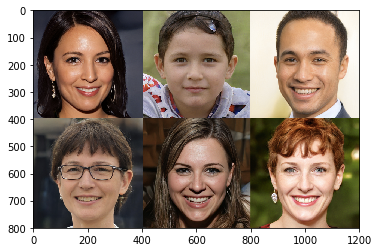

In [122]:
plt.imshow(im)

In [124]:
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
face = face_detect.detectMultiScale(gray)

In [127]:
for (u,v,x,y) in face:
    cv2.rectangle(im, (u,v), (u+x,v+y) ,(255,0,0) ,3)
    eyes = eye_detect.detectMultiScale(gray)
    if(x+y !=0):
        for (ex,ey,ew,ez) in eyes:
            ratio = float(ew*ez)/(x*y)
            if ratio<0.1 and ratio>0.045:
                cv2.rectangle(im,(ex,ey),(ex+ew,ey+ez),(225,0,0),3)
    else:
        print "No face detected"    

In [128]:
mouths = mouth_detect.detectMultiScale(gray)

error: OpenCV(3.4.4) C:\projects\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1698: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


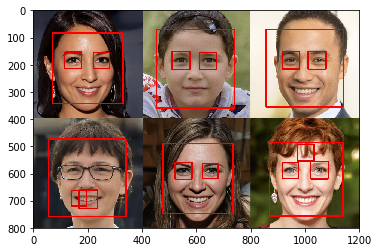

In [94]:
plt.imshow(im)

## Eye and face detection(real time)

In [19]:
vc = cv2.VideoCapture(0)

while True:
    rval, im = vc.read()
    gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    #gray = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1) //bad idea
    face = face_detect.detectMultiScale(gray)
    for (u,v,x,y) in face:
        cv2.rectangle(im, (u,v), (u+x,v+y) ,(255,0,0) ,3)
        eyes = eye_detect.detectMultiScale(gray)
        if(x+y !=0):
            for (ex,ey,ew,ez) in eyes:
                #ratio = float(ew*ez)/(x*y) //wont work for asian people
                cv2.rectangle(im,(ex,ey),(ex+ew,ey+ez),(22,220,22),1)
    cv2.imshow("preview", im)

    key = cv2.waitKey(20)
    if key == 27: 
            break
vc.release()
cv2.destroyAllWindows()